Importing necessary libraries

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [18]:
# Load the CSV file and fix column issues
data = pd.read_csv("ener_Re_time(2).csv")
data.columns = data.columns.str.strip()  # Remove extra spaces if any
print("Columns after stripping:", data.columns)

# Check if the expected columns exist
if {'time', 'energy', 'Re_lambda'}.issubset(data.columns):
    x = data[['time', 'energy']]
    y = data['Re_lambda']
else:
    print("Column names do not match!")
    print(data.columns)


Columns after stripping: Index(['time', 'energy', 'Re_lambda'], dtype='object')


Splitting the data

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)


1. Correlation Matrix (heatmap)

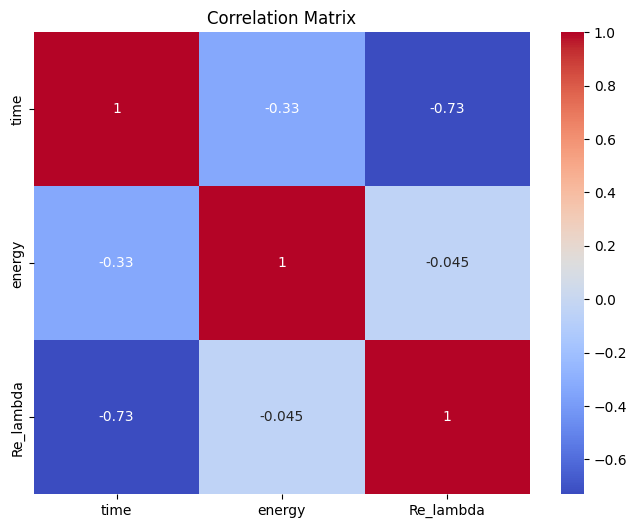

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

2. Mutual Information Score

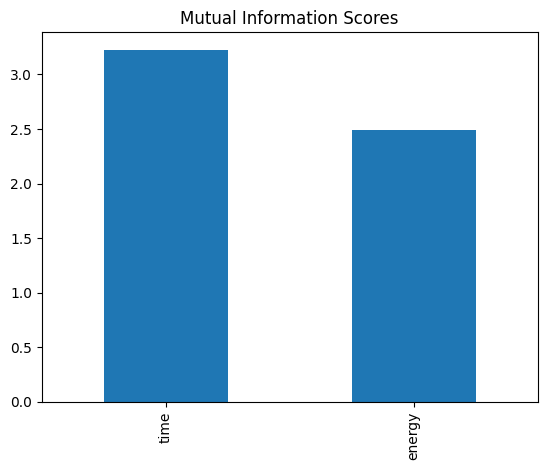

In [28]:
mi = mutual_info_regression(x_train, y_train)
mi_series = pd.Series(mi, index=x_train.columns)
mi_series.sort_values(ascending=False).plot(kind='bar')
plt.title("Mutual Information Scores")
plt.show()

3. Recursive Feature Elimination (RFE)

In [33]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
rfe.fit(x_train, y_train)
print("RFE Rankings:", dict(zip(x_train.columns, rfe.ranking_)))

RFE Rankings: {'time': 2, 'energy': 1}


4. Feature Importance using Random Forest

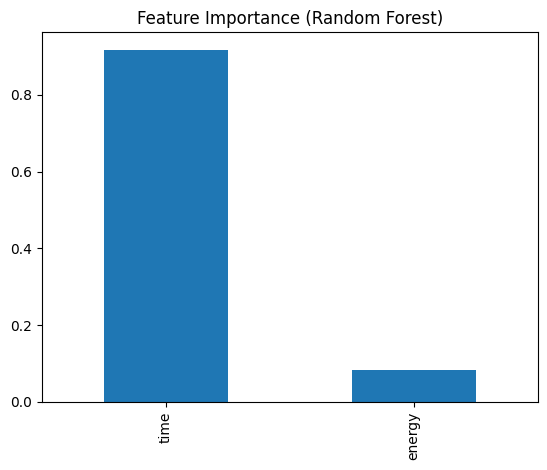

In [34]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index = x_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.show()

Selecting most important features (RFE and Random Forest) and Re-train pipeline using the selected features only

In [35]:
# Selecting most important features (RFE and Random Forest)
selected_features = ['time', 'energy']

# Re-train pipeline using the selected features only
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(x_train_selected, y_train)



Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

Make predictions and do evaluation

In [36]:
y_pred = pipeline.predict(x_test_selected)
mse = mean_squared_error(y_test, y_pred)
print(f"Final MSE(Mean Squared Error with selected features: {mse})")

Final MSE(Mean Squared Error with selected features: 51.33691894745879)
